# Problem 2 a

In [1]:
from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import model_selection
import math
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn.externals.six import StringIO

from IPython.display import Image
from sklearn import metrics
%matplotlib inline

#read the data

data1 = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None)


data2 = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',header=None,skiprows=1)

data=pd.concat([data1, data2], axis=0, join='inner')
#print(data.shape)

X = data[list(range(14))]
y = data[[14]]
X.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','apital_loss','hours_per_week','native_country']
y.columns=['income']

# split into 60-40 train/test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size=0.4 )

#fill in missing values

X_train.replace([' ?'],X_train['age'].mean())
X_train.replace([' ?'],X_train['workclass'].mode())
X_train.replace([' ?'],X_train['fnlwgt'].mean())
X_train.replace([' ?'],X_train['education'].mode())
X_train.replace([' ?'],X_train['education_num'].mean())
X_train.replace([' ?'],X_train['marital_status'].mode())
X_train.replace([' ?'],X_train['occupation'].mode())
X_train.replace([' ?'],X_train['relationship'].mode())
X_train.replace([' ?'],X_train['race'].mode())
X_train.replace([' ?'],X_train['sex'].mode())
X_train.replace([' ?'],X_train['capital_gain'].mean())
X_train.replace([' ?'],X_train['apital_loss'].mean())
X_train.replace([' ?'],X_train['hours_per_week'].mean())
X_train.replace([' ?'],X_train['native_country'].mode())

#fill in missing values of the test data
X_test.replace([' ?'],X_train['age'].mean())
X_test.replace([' ?'],X_train['workclass'].mode())
X_test.replace([' ?'],X_train['fnlwgt'].mean())
X_test.replace([' ?'],X_train['education'].mode())
X_test.replace([' ?'],X_train['education_num'].mean())
X_test.replace([' ?'],X_train['marital_status'].mode())
X_test.replace([' ?'],X_train['occupation'].mode())
X_test.replace([' ?'],X_train['relationship'].mode())
X_test.replace([' ?'],X_train['race'].mode())
X_test.replace([' ?'],X_train['sex'].mode())
X_test.replace([' ?'],X_train['capital_gain'].mean())
X_test.replace([' ?'],X_train['apital_loss'].mean())
X_test.replace([' ?'],X_train['hours_per_week'].mean())
X_test.replace([' ?'],X_train['native_country'].mode())
print(len(X_train))

29305


In [2]:
Xnew = pd.concat([X_train, X_test], axis=0, join='inner')
ynew = pd.concat([y_train, y_test], axis=0, join='inner')

#additional pre-processing
# dummy code the variables
workcalssDummies = pd.get_dummies(Xnew.workclass, prefix='workclass').iloc[:, 1:]
educationDummies = pd.get_dummies(Xnew.education, prefix='education').iloc[:, 1:]
marital_statusDummies = pd.get_dummies(Xnew.marital_status, prefix='marital_status').iloc[:, 1:]
occupationDummies = pd.get_dummies(Xnew.occupation, prefix='occupation').iloc[:, 1:]
relationshipDummies = pd.get_dummies(Xnew.relationship, prefix='relationship').iloc[:, 1:]
raceDummies = pd.get_dummies(Xnew.education, prefix='race').iloc[:, 1:]
sexDummies = pd.get_dummies(Xnew.sex, prefix='sex').iloc[:, 1:]
native_countryDummies = pd.get_dummies(Xnew.native_country, prefix='native_country').iloc[:, 1:]
incomeDummies = pd.get_dummies(ynew.income, prefix='income').iloc[:, 1:]

# concatenate the dummy variables and drop the duplicates
XDF = pd.concat([Xnew, workcalssDummies, educationDummies, marital_statusDummies,occupationDummies,relationshipDummies,raceDummies,sexDummies,native_countryDummies], axis=1)
XDF.drop(XDF.columns[[1,3,5,6,7,8,9,13]], axis=1, inplace=True)
#y_trainDF = incomeDummies.colums[[0]].values

X_Newtrain=XDF[0:len(y_train)]
X_Newtest=XDF[len(y_train):len(XDF)]
# pre-processing the test data

ynew.replace([' >50K',' >50K.',' <=50K',' <=50K.'],[1,1,0,0],inplace=True)
y_Newtrain=ynew[0:len(y_train)]
y_Newtest=ynew[len(y_train):len(XDF)]

X_Newtest=np.array(X_Newtest)
X_Newtrain=np.array(X_Newtrain)
y_Newtrain=np.array(y_Newtrain)
y_Newtest=np.array(y_Newtest)

y_Newtrain=y_Newtrain[:,0]
y_Newtest=y_Newtest[:,0]

# Problem 2 b

In [4]:
class_accuracy=np.zeros((30,50))
#range(1,31)  range(1,51)
for maxd in range(1,31):
    for minl in range(1,51):
        clf = DecisionTreeClassifier(max_depth = maxd, min_samples_leaf = minl)
        clf.fit(X_Newtrain,y_Newtrain)
        score = model_selection.cross_val_score(clf,X_Newtrain, y_Newtrain, cv=3,scoring='accuracy')
        class_accuracy[maxd-1,minl-1]=score.mean()
   

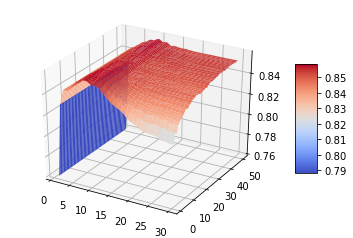

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X=np.arange(1,31)
y=np.arange(1,51)
YY,XX = np.meshgrid(y, X)
# Plot the surface.
surf = ax.plot_surface(XX, YY, class_accuracy, cmap=cm.coolwarm,linewidth=0, antialiased=True)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [8]:
re=np.where(class_accuracy==np.max(class_accuracy))
opt_maxdepth=re[0][0]
opt_minleaf=re[1][0]
print("the best choice of maxdepth is:",opt_maxdepth)
print("the best choice of minimum number of samples is:",opt_minleaf)

the best choice of maxdepth is: 9
the best choice of minimum number of samples is: 42


# problem 2 c

In [9]:
clf = DecisionTreeClassifier(max_depth = opt_maxdepth, min_samples_leaf = opt_minleaf)
clf.fit(X_Newtrain,y_Newtrain)
y_testhat=clf.predict(X_Newtest)

print("the score when using the optimal maxdepth and minimum number of samples is ",metrics.accuracy_score(y_Newtest, y_testhat))

the score when using the optimal maxdepth and minimum number of samples is  0.855658494139


# problem 2 d

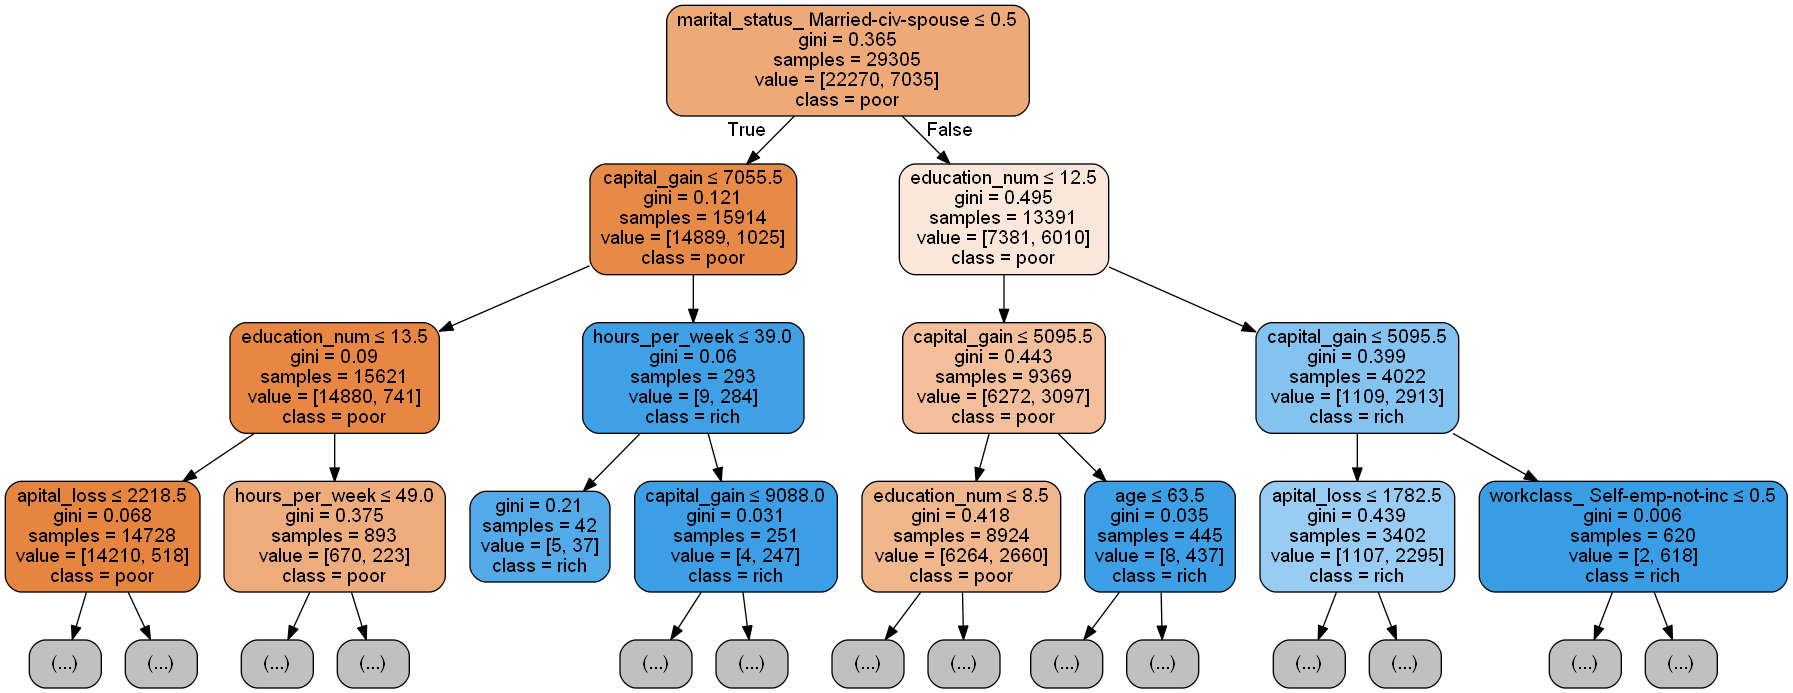

In [10]:
import pydotplus
from sklearn import tree
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,max_depth=3,  
                     feature_names=XDF.columns,  
                     class_names=["poor", "rich"],  
                     filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  